# Assigment 1

## Spectral Clustering
- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

## Chosen Dataset 
## IoT dataset for Intrusion Detection Systems (IDS)

Description:\
The BoTNeTIoT-L01 dataset is a refined version of the detection_of_IoT_botnet_attacks_N_BaIoT (BoTNeTIoT) dataset, consolidating IoT device traffic data into 10-second time windows to reduce redundancy. The dataset captures traffic from nine IoT devices, including two types of botnet attacks (Mirai and Gafgyt). It features twenty-three statistically engineered features derived from .pcap files, computed with seven statistical measures over the time window of 10 seconds (L0.1). These measures include mean, variance, count, magnitude, radius, covariance, and correlation coefficient. The features are extracted from packet count, jitter, size of outbound packets only, and outbound and inbound packets together. Class labels (0 for attacks, 1 for normal samples) categorize the data, and the decay factor value (0.1) is used consistently throughout the dataset and associated papers to denote the time window. This dataset is valuable for research in IoT security and botnet detection, offering a focused and feature-rich perspective on network traffic behavior.

Reference:
- A. Alhowaide, I. Alsmadi, J. Tang. “Towards the design of real-time autonomous IoT NIDS”, Cluster Computing (2021), pages 1-14, Jan 2021.\
- A. Alhowaide, I. Alsmadi, J. Tang, “Features Quality Impact on Cyber Physical Security Systems”, 2019 IEEE 10th Annual Information Technology, Electronics and Mobile Communication Conference (IEMCON), Oct. 2019.\
- A. Alhowaide, I. Alsmadi, J. Tang. “PCA, Random-Forest and Pearson Correlation for Dimensionality Reduction in IoT IDS”, 2020 IEEE International IOT, Electronics and Mechatronics Conference (IEMTRONICS), pages. 1-6. Vancouver, BC, Canada, Sept. 2020. \
- A. Alhowaide, I. Alsmadi, J. Tang. “An Ensemble Feature Selection Method for IoT IDS”, 2020 IEEE 6th International Conference on Dependability in Sensor, Cloud and Big Data Systems and Application (DependSys), Fiji, Dec. 2020.
- https://www.kaggle.com/datasets/azalhowaide/iot-dataset-for-intrusion-detection-systems-ids

### Scope and Limitations
ONly a portion of the data set was used around 5000 non-duplicated dataset. 
### NOTE: Dataset not uploaded in github due to the large size. Thus the link provided above can help navigate to the data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.pipeline import Pipeline

In [11]:
file_path = "./BotNeTIoT-L01_label_NoDuplicates.csv"

data = pd.read_csv(file_path)

# Sample 5000 rows randomly
sampled_data = data.sample(n=5000, random_state=42)
sample_data = data;
sampled_data.head()

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
1857725,3782147,2950.146671,311.955429,60953.818078,2950.146671,311.955429,60953.818078,1505.293386,553.668778,12.787258,...,2.304175e+00,3.459411e+09,1504.284102,554.0,0.00002,554.0,4.074536e-10,0.0,0.0,0
1608,1608,1947.176644,74.058476,1.499162,1947.176644,74.058476,1.499162,1941.426776,74.000000,0.000005,...,5.853347e+05,8.811212e+14,1.000000,74.0,0.00000,74.0,0.000000e+00,0.0,0.0,0
882203,945695,5007.278476,340.633954,59874.376119,5007.278476,340.633954,59874.376119,1.000000,60.000000,0.000000,...,1.507660e+09,0.000000e+00,1.000000,60.0,0.00000,60.0,0.000000e+00,0.0,0.0,0
1735907,3660329,4174.923567,340.356772,59873.624507,4174.923567,340.356772,59873.624507,1.000000,60.000000,0.000000,...,1.507656e+09,0.000000e+00,1.000000,60.0,0.00000,60.0,0.000000e+00,0.0,0.0,0
559662,623154,6647.805508,69.314684,43.901096,6647.805508,69.314684,43.901096,1.000000,60.000000,0.000000,...,1.507657e+09,0.000000e+00,1.000000,60.0,0.00000,60.0,0.000000e+00,0.0,0.0,0


In [12]:
# Normalizing the Data
X_normalized = normalize(sampled_data)  # Replace 'normalize' with the actual normalization function you intend to use

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=sampled_data.columns)  # Assuming your normalization function returns a NumPy array

# Reducing the dimensions of the data using PCA
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# Displaying the first few rows of the resulting DataFrame
X_principal.head(2)

,P1,P2
0,-0.658439,-0.432082
1,-0.658317,-0.432969


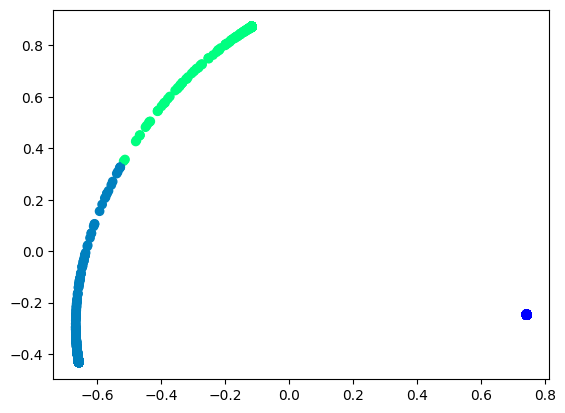

In [13]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters=3, affinity='rbf')

# Training the model and storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels_rbf, cmap=plt.cm.winter)
plt.show()


## Conclusion
Based on the graph, it's evident that the dataset regarding the detection of IoT botnet attacks is clustered into one group. However, it's noticeable that there's a data point that seems to have shifted away from the main cluster. When there's only one cluster, it suggests that the algorithm didn't find significant differences among our data points to form distinct groups. This implies our data is quite uniform, and the algorithm couldn't pinpoint clear subgroups. Several reasons could account for this, like our data being naturally similar, the clustering algorithm or its settings not being the best match, or perhaps our dataset lacking enough variability to reveal clear clusters. It might be helpful to explore the features in our data, try out different clustering methods or parameters, and seek advice from domain experts if applicable. The absence of multiple clusters could be entirely reasonable based on the characteristics of our data.

## Eigenvector Centrality

Given the following graph below, find it eigenvector centrality

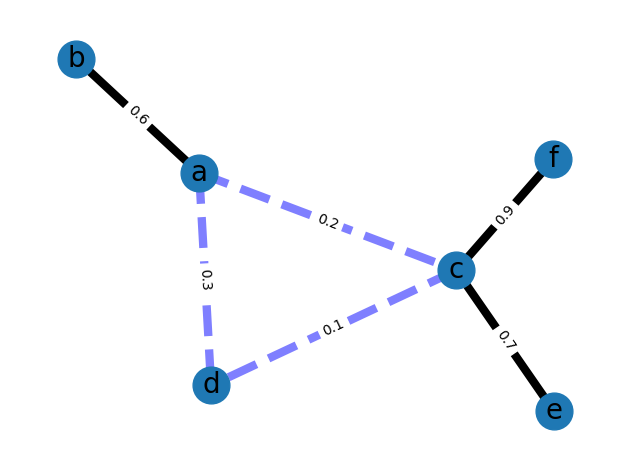

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [15]:
nx.eigenvector_centrality(G)

{'a': 0.51807347662071,
 'b': 0.21182192277183212,
 'c': 0.5986761070959697,
 'd': 0.4566010978754134,
 'e': 0.24477918831750853,
 'f': 0.24477918831750853}

# Assignment 2

Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).
On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

## TOPIC :  Rise of Counter-Strike 2, comeback of CS in FPS gaming
### Introduction
The release of "Counter-Strike 2" (CS2), the successor to the highly popular game "Counter-Strike: Global Offensive" (CS:GO), stands as one of the most eagerly anticipated events in the first-person shooter (FPS) gaming genre. CS:GO was among the top games frequently discussed on platforms like Reddit, particularly during the early to mid-2010s. With the introduction of CS2, there has been a notable resurgence in the Counter-Strike franchise within the FPS gaming landscape. This resurgence has become a focal point of discussion across various social media platforms, with Reddit being a particularly active forum for enthusiasts engaging in conversations about the game.
### Hypothesis
The release of Counter-Strike 2 (CS2) is likely to not only reinvigorate interest in the FPS gaming genre but also become a focal point for heightened social media discussions, particularly on platforms such as Reddit. The anticipation surrounding CS2's release is expected to generate a significant surge in online conversations, with gaming communities actively sharing opinions, insights, and experiences related to the game. The advancements and innovations introduced in CS2, combined with the established popularity of the Counter-Strike franchise, may contribute to an elevated level of engagement on social media, making CS2 a central topic of discussion and community interaction beyond the gaming sphere.

In [12]:
from itertools import chain
import praw
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def recursive_node_adder(g, comment, parent_author):
    '''Recursively process comments and add them to the graph'''
    
    # Check if the comment has a valid author
    if comment.author is not None:
        # Check if we have the node already in our graph
        if comment.author not in g.nodes:
            g.add_node(comment.author)
        # Create an edge between this comment author and the parent author
        g.add_edge(comment.author, parent_author)
        
        # Iterate through the comments
        for reply in comment.replies.list():
            if isinstance(reply, praw.models.MoreComments):
                continue
            # Recursively process this reply
            recursive_node_adder(g, reply, comment.author)
    else:
        # Handle the case where the comment has no valid author
        print("Skipping comment with no author:", comment)

redditApi = praw.Reddit(
    client_id="mNQnyJkMubX9lIwIjXI9gw",
    client_secret="St9ELjYxyXf5Y6rp5Wt_V8NKr9lwnQ",
    user_agent="TestingAPI by u/AskImpossible38",
)

g = nx.Graph()
subreddit = "cs2"
breadthCommentCount = 20
targetSub = redditApi.subreddit(subreddit)
submissions = targetSub.hot(limit=20)
for post in submissions:
    print (post.author, "-", post.title)
    # Check if we have the node already in our graph
    if post.author not in g.nodes:
        g.add_node(post.author)
    post.comment_limit = breadthCommentCount
    # Get the top few comments
    for comment in post.comments.list():
        # Skip MoreComment objects, which don't have authors
        if isinstance(comment, praw.models.MoreComments):
            continue
        # Recursively process this reply
        recursive_node_adder(g, comment, post.author)

mousesports - Hello there, r/cs2 👋 We sat down and filmed our first Reddit exclusive Interview for you. Stay tuned for more Reddit exclusive content from our side 🙌
cartRL - Yes, you still can get banned for high DPI spinning.
blutopfer165 - CS2 state rn
evilkanevil - After 15 years of monthly CS2...
SrDieAntwoord - Santa Claus entry (gift included)
Lightthebringer - CS2 Flaming Knife
MoonShinerTX - Bottom Frag Hero
ComfortableOk1966 - I was scraping halo sticker and almost scraped sticker look like "117".Can someone explain meaning of this?
R3N3007 - Surf is Broken and We Need Valve's Help
SSho_0ter - Cheating problem in Cs2? Let me share my CS:GO experience.
Skipping comment with no author: kdp0qiq
EllisDesignAndTrade - Must be the gaming chair
MAK1NHO_ - CS2 Prime Problem
clashzx7 - which servers are tournaments played on?
DirtSchlurpy - Beginners guide to mirage
Sowlid - How to igl Apex
No-Reindeer8827 - ESL PRO CHALLENGER CHEAT
Skipping comment with no author: kdq6mxw
Skipping com

In [13]:
print("Graph Info:")
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
# Calculate average degree
avg_degree = sum(dict(g.degree()).values()) / len(g)
print("Average Degree:", avg_degree)

Graph Info:
Number of nodes: 147
Number of edges: 189
Average Degree: 2.5714285714285716


In [14]:
print("Density of graph = ", nx.transitivity(g))
print("Transitivity of graph = ", nx.density(g))

Density of graph =  0.16775396085740912
Transitivity of graph =  0.01761252446183953


In [15]:
centrality = nx.degree_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='cartRL'), 0.13013698630136986),
 (Redditor(name='blutopfer165'), 0.13013698630136986),
 (Redditor(name='MoonShinerTX'), 0.13013698630136986),
 (Redditor(name='Cloud_Dwelling'), 0.1232876712328767),
 (Redditor(name='SSho_0ter'), 0.11643835616438356),
 (Redditor(name='No-Reindeer8827'), 0.10273972602739725),
 (Redditor(name='Lightthebringer'), 0.06164383561643835),
 (Redditor(name='Hopeful_Loan6858'), 0.0547945205479452),
 (Redditor(name='EllisDesignAndTrade'), 0.0410958904109589),
 (Redditor(name='Horror-Goose-1445'), 0.0410958904109589),
 (Redditor(name='mousesports'), 0.03424657534246575),
 (Redditor(name='Russki_Wumao'), 0.03424657534246575),
 (Redditor(name='throw_this_away_k'), 0.03424657534246575),
 (Redditor(name='Neat_Concert_4138'), 0.03424657534246575),
 (Redditor(name='VVormgod666'), 0.03424657534246575),
 (Redditor(name='Real_Cable_2925'), 0.0273972602739726),
 (Redditor(name='bamboy12'), 0.0273972602739726),
 (Redditor(name='b0red_cs'), 0.0273972602739726),

In [16]:
centrality = nx.closeness_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='Real_Cable_2925'), 0.1373668188736682),
 (Redditor(name='MoonShinerTX'), 0.13548508162882342),
 (Redditor(name='cartRL'), 0.13187214611872147),
 (Redditor(name='blutopfer165'), 0.13013698630136986),
 (Redditor(name='SSho_0ter'), 0.11643835616438356),
 (Redditor(name='Cloud_Dwelling'), 0.1107744994731296),
 (Redditor(name='RalphEins'), 0.10750446694460988),
 (Redditor(name='marlostanfield89'), 0.10750446694460988),
 (Redditor(name='Horror-Goose-1445'), 0.10667174023338408),
 (Redditor(name='No-Reindeer8827'), 0.09600456621004566),
 (Redditor(name='The-Losers-Club1259'), 0.09157787924911212),
 (Redditor(name='b0red_cs'), 0.09073771521930375),
 (Redditor(name='Busy_Consequence_102'), 0.09073771521930375),
 (Redditor(name='FiveOhFive91'), 0.09073771521930375),
 (Redditor(name='Highcorebtw'), 0.09073771521930375),
 (Redditor(name='No-Paleontologist560'), 0.09073771521930375),
 (Redditor(name='PGyoda'), 0.09073771521930375),
 (Redditor(name='jazzfruit'), 0.09073771521930375)

In [17]:
centrality = nx.betweenness_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='MoonShinerTX'), 0.04794520547945205),
 (Redditor(name='cartRL'), 0.044402456306093525),
 (Redditor(name='Real_Cable_2925'), 0.03415210203117619),
 (Redditor(name='Cloud_Dwelling'), 0.02947567312234294),
 (Redditor(name='No-Reindeer8827'), 0.02172886159659896),
 (Redditor(name='Horror-Goose-1445'), 0.019650448748228626),
 (Redditor(name='blutopfer165'), 0.013824594552039047),
 (Redditor(name='SSho_0ter'), 0.011667453944260745),
 (Redditor(name='Lightthebringer'), 0.0032120925838450636),
 (Redditor(name='EllisDesignAndTrade'), 0.001086443079829948),
 (Redditor(name='Hopeful_Loan6858'), 0.0007872775940796726),
 (Redditor(name='ComfortableOk1966'), 0.0005668398677373641),
 (Redditor(name='mousesports'), 0.00028341993386868207),
 (Redditor(name='throw_this_away_k'), 0.00014170996693434103),
 (Redditor(name='evilkanevil'), 9.44733112895607e-05),
 (Redditor(name='Russki_Wumao'), 4.723665564478035e-05),
 (Redditor(name='The-Losers-Club1259'), 4.723665564478035e-05),
 (Redditor

In [22]:
centrality = nx.eigenvector_centrality(g, max_iter=1000)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='blutopfer165'), 0.5875075668696957),
 (Redditor(name='Hopeful_Loan6858'), 0.37366565377334104),
 (Redditor(name='bamboy12'), 0.24779064927896274),
 (Redditor(name='UraniumDisulfide'), 0.21525674000055084),
 (Redditor(name='BrianTM'), 0.21525674000055084),
 (Redditor(name='Intrepid_Ad_7288'), 0.2082092477969896),
 (Redditor(name='kebobs22'), 0.2082092477969896),
 (Redditor(name='SrijanGods'), 0.2082092477969896),
 (Redditor(name='craaaaaaig'), 0.2082092477969896),
 (Redditor(name='Altruistic-Bat-3353'), 0.16245731931983115),
 (Redditor(name='Federal-Variation-21'), 0.16245731931983115),
 (Redditor(name='tunaonigiri'), 0.16245731931983115),
 (Redditor(name='deadite77'), 0.12726583090937796),
 (Redditor(name='_M_I_T_I__N-M'), 0.12726583090937796),
 (Redditor(name='BannockBnok'), 0.12726583090937796),
 (Redditor(name='BustyFemPyro'), 0.12726583090937796),
 (Redditor(name='CheesecakeDiscoParty'), 0.104606073610939),
 (Redditor(name='RickyTrailerLivin'), 0.104606073610939),


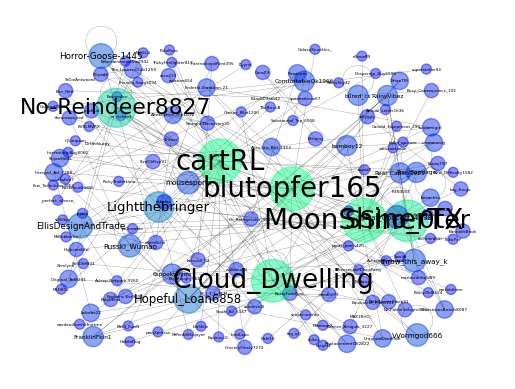

In [24]:
def draw_scaled_graph(graph, scaling_map, scale=1):
    pos = nx.spring_layout(graph, scale=50, iterations=5, k=0.4)
    for node, (x, y) in pos.items():
        plt.text(x, y, node, fontsize=max(scaling_map[node] * 20 * scale, 3), ha="center", va="center")

    nx.draw(graph, pos, width=0.25, alpha=0.45,
            node_color=list(scaling_map.values()), cmap=plt.cm.winter, 
            node_size=[degs * 1000 * scale for degs in scaling_map.values()])

node_degrees = dict(g.degree)
deg_range = max(node_degrees.values()) - min(node_degrees.values())
node_degrees = {node: (deg - min(node_degrees.values())) / deg_range for node, deg in node_degrees.items()}

draw_scaled_graph(g, node_degrees)

## Conclusion
As expected, due to the release of CS2, there has been a resurgence of popularity and new discussions and post regarding the game are encountered in reddit. Based on the finds, there are a 5 users namely: cartRL, bluetopfer165, MoonSlime (not clear),Cloud_Dwellingm No-Reindeer8827 are one of the most influential and had a lot of interaction in the discussions of the topic in "CS2".